# Libraries

In [1]:
# Data Manipulation
import numpy as np
import pandas as pd
import os

# Data Visualization
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import style
import plotly.express as px
import plotly.graph_objects as go
from yellowbrick.cluster import SilhouetteVisualizer

# Preprocessing and Modeling
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.impute import SimpleImputer
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from tqdm import tqdm

# Matplotlib Style
style.use('ggplot') or plt.style.use('ggplot')

# Random Seed
RANDOM_STATE = 123

# Data

The sample Dataset summarizes the usage behavior of about 9000 active credit card holders during the last 6 months. The file is at a customer level with 18 behavioral variables.

- `CUSTID`: Identification of Credit Card holder (Categorical)
- `BALANCE`: Balance amount left in their account to make purchases (
- `BALANCEFREQUENCY` : How frequently the Balance is updated, score between 0 and 1 (1 = frequently updated, 0 = not frequently updated)
- `PURCHASES` : Amount of purchases made from account
- `ONEOFFPURCHASES` : Maximum purchase amount done in one-go
- `INSTALLMENTSPURCHASES`: Amount of purchase done in installment
- `CASHADVANCE`: Cash in advance given by the user
- `PURCHASESFREQUENCY`: How frequently the Purchases are being made, score between 0 and 1 (1 = frequently purchased, 0 = not frequently purchased)
- `ONEOFFPURCHASESFREQUENCY`: How frequently Purchases are happening in one-go (1 = frequently purchased, 0 = not frequently purchased)
-  `PURCHASESINSTALLMENTSFREQUENCY`: How frequently purchases in installments are being done (1 = frequently done, 0 = not frequently done)
-  `CASHADVANCEFREQUENCY`: How frequently the cash in advance being paid
-  `CASHADVANCETRX`: Number of Transactions made with "Cash in Advanced"
-  `PURCHASESTRX`: Numbe of purchase transactions made
-  `CREDITLIMIT`: Limit of Credit Card for user
-  `PAYMENTS`: Amount of Payment done by user
-  `MINIMUM_PAYMENTS`: Minimum amount of payments made by user
-  `PRCFULLPAYMENT`: Percent of full payment paid by user
-  `TENURE`: Tenure of credit card service for user

Source: [Kaggle](https://www.kaggle.com/arjunbhasin2013/ccdata) 

In [2]:
path_credit = "credit_card_dataset"
file_credit = "CC GENERAL.csv"

In [3]:
# Open csv from path_credit
credit_card = pd.read_csv(os.path.join(path_credit, file_credit))
credit_card.head()

CUST_ID      BALANCE  BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES  \
0  C10001    40.900749           0.818182      95.40              0.00   
1  C10002  3202.467416           0.909091       0.00              0.00   
2  C10003  2495.148862           1.000000     773.17            773.17   
3  C10004  1666.670542           0.636364    1499.00           1499.00   
4  C10005   817.714335           1.000000      16.00             16.00   

   INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
0                    95.4      0.000000             0.166667   
1                     0.0   6442.945483             0.000000   
2                     0.0      0.000000             1.000000   
3                     0.0    205.788017             0.083333   
4                     0.0      0.000000             0.083333   

   ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
0                    0.000000                          0.083333   
1                    0.000000                          0.000000   
2                    1.000000                          0.000000   
3                    0.083333                          0.000000   
4                    0.083333                          0.000000   

   CASH_ADVANCE_FREQUENCY  CASH_ADVANCE_TRX  PURCHASES_TRX  CREDIT_LIMIT  \
0                0.000000                 0              2        1000.0   
1                0.250000                 4              0        7000.0   
2                0.000000                 0             12        7500.0   
3                0.083333                 1              1        7500.0   
4                0.000000                 0              1        1200.0   

      PAYMENTS  MINIMUM_PAYMENTS  PRC_FULL_PAYMENT  TENURE  
0   201.802084        139.509787          0.000000      12  
1  4103.032597       1072.340217          0.222222      12  
2   622.066742        627.284787          0.000000      12  
3     0.000000               NaN          0.000000      12  
4   678.334763        244.791237          0.000000      12

# Exploratory Data Analysis

## Data Types and Summary

All variables are numerical(integer or float) except for `CUST_ID`.

In [4]:
# Column type
credit_card.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           8950 non-null   object 
 1   BALANCE                           8950 non-null   float64
 2   BALANCE_FREQUENCY                 8950 non-null   float64
 3   PURCHASES                         8950 non-null   float64
 4   ONEOFF_PURCHASES                  8950 non-null   float64
 5   INSTALLMENTS_PURCHASES            8950 non-null   float64
 6   CASH_ADVANCE                      8950 non-null   float64
 7   PURCHASES_FREQUENCY               8950 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 11  CASH_ADVANCE_TRX                  8950 non-null   int64  
 12  PURCHA

In [5]:
credit_card.describe()

BALANCE  BALANCE_FREQUENCY     PURCHASES  ONEOFF_PURCHASES  \
count   8950.000000        8950.000000   8950.000000       8950.000000   
mean    1564.474828           0.877271   1003.204834        592.437371   
std     2081.531879           0.236904   2136.634782       1659.887917   
min        0.000000           0.000000      0.000000          0.000000   
25%      128.281915           0.888889     39.635000          0.000000   
50%      873.385231           1.000000    361.280000         38.000000   
75%     2054.140036           1.000000   1110.130000        577.405000   
max    19043.138560           1.000000  49039.570000      40761.250000   

       INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
count             8950.000000   8950.000000          8950.000000   
mean               411.067645    978.871112             0.490351   
std                904.338115   2097.163877             0.401371   
min                  0.000000      0.000000             0.000000   
25%                  0.000000      0.000000             0.083333   
50%                 89.000000      0.000000             0.500000   
75%                468.637500   1113.821139             0.916667   
max              22500.000000  47137.211760             1.000000   

       ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
count                 8950.000000                       8950.000000   
mean                     0.202458                          0.364437   
std                      0.298336                          0.397448   
min                      0.000000                          0.000000   
25%                      0.000000                          0.000000   
50%                      0.083333                          0.166667   
75%                      0.300000                          0.750000   
max                      1.000000                          1.000000   

       CASH_ADVANCE_FREQUENCY  CASH_ADVANCE_TRX  PURCHASES_TRX  CREDIT_LIMIT  \
count             8950.000000       8950.000000    8950.000000   8949.000000   
mean                 0.135144          3.248827      14.709832   4494.449450   
std                  0.200121          6.824647      24.857649   3638.815725   
min                  0.000000          0.000000       0.000000     50.000000   
25%                  0.000000          0.000000       1.000000   1600.000000   
50%                  0.000000          0.000000       7.000000   3000.000000   
75%                  0.222222          4.000000      17.000000   6500.000000   
max                  1.500000        123.000000     358.000000  30000.000000   

           PAYMENTS  MINIMUM_PAYMENTS  PRC_FULL_PAYMENT       TENURE  
count   8950.000000       8637.000000       8950.000000  8950.000000  
mean    1733.143852        864.206542          0.153715    11.517318  
std     2895.063757       2372.446607          0.292499     1.338331  
min        0.000000          0.019163          0.000000     6.000000  
25%      383.276166        169.123707          0.000000    12.000000  
50%      856.901546        312.343947          0.000000    12.000000  
75%     1901.134317        825.485459          0.142857    12.000000  
max    50721.483360      76406.207520          1.000000    12.000000

## Data Size and Missing Values

We have $8950$ observations(rows) and $21$ columns in the data set.

In [6]:
# Data Size
credit_card.shape

(8950, 18)

There are missing values in the columns `minimum_payments`, `cash_advance`, `activated_date`, `last_payment_date`, `balance`, `credit_limit`.

In [7]:
# Missing Values Percentage
missing_values = credit_card.isna().mean().sort_values(ascending = False)
missing_values = missing_values[missing_values > 0]*100
missing_values

MINIMUM_PAYMENTS    3.497207
CREDIT_LIMIT        0.011173
dtype: float64

In [8]:
# Plot Missing Values
miss_plot = missing_values.plot.bar(figsize = (10, 7), 
                                    fontsize = 15, 
                                    color = "c", 
                                    alpha = 0.9,
                                    rot = 0)
miss_plot.set_title("Missing Values in Percentage", fontdict = {'fontsize': 20})

Text(0.5, 1.0, 'Missing Values in Percentage')

## Duplicated Observations

We do not have duplicated observations.

In [9]:
credit_card.duplicated().sum()

0

## Outliers

Most of the features have outliers then it could be better use log-transformation.

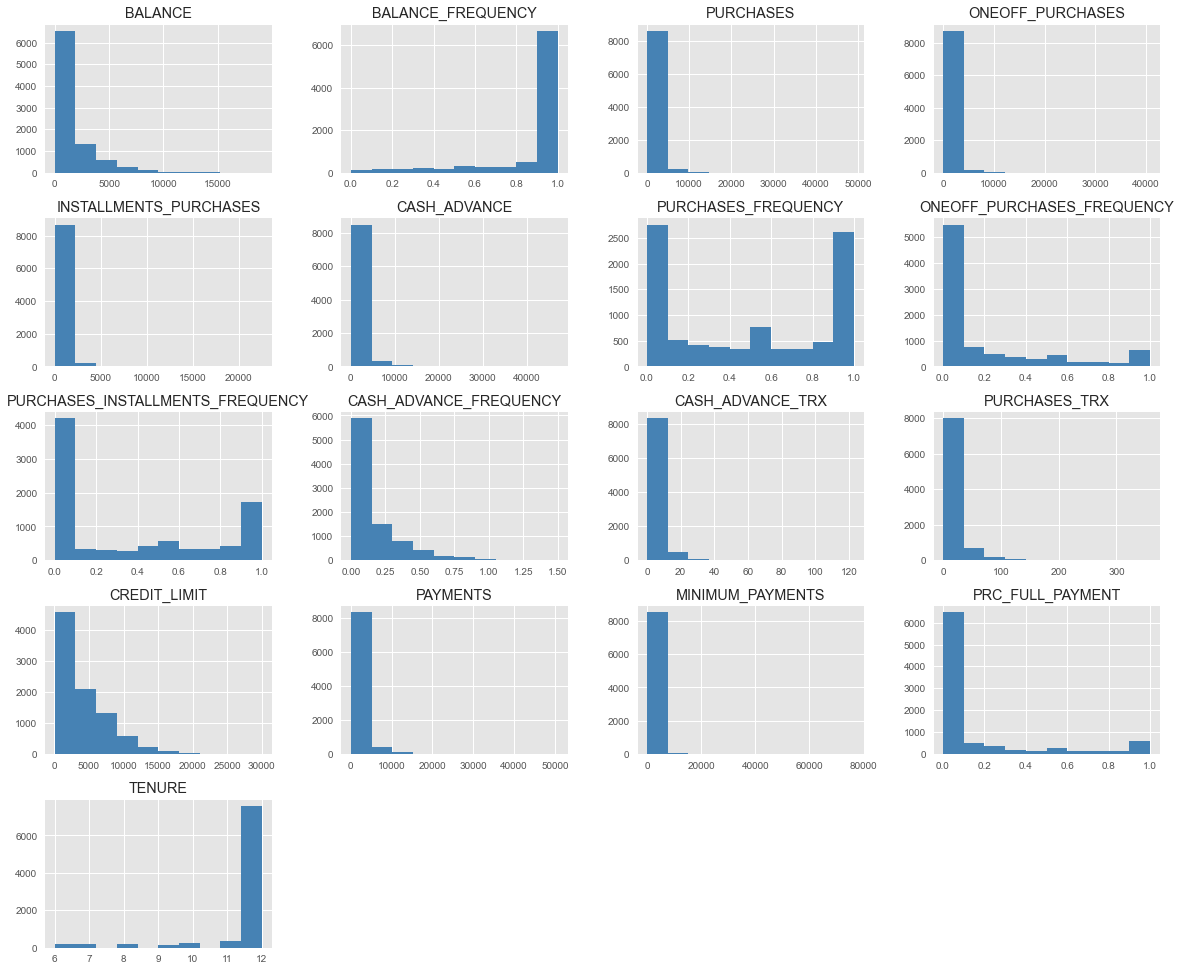

In [10]:
# Histograms
credit_card.hist(figsize = (20, 17), color = "steelblue")
plt.show()

# Data Preparation

In [11]:
X = credit_card.copy()

## Droping Useless Features

We can drop the `CUST_ID` column beacuse it is not necessary for the clustering.

In [12]:
X.drop("CUST_ID", axis = 1, inplace = True)

## Filling Missing Values

We fill the missing values with the median beacuse in the Data Types and Summary we saw outliers.

In [13]:
imp_median = SimpleImputer(missing_values = np.nan, strategy = "median")
X = imp_median.fit_transform(X)
X = pd.DataFrame(X, columns = [c for c in credit_card.columns if c != "CUST_ID"])

## Dealing with Outliers

In the next plots we can see that the most features have outliers

We transformed the data to deal with skewness.

In [14]:
X = np.log(X + 1)
X.hist(figsize = (20, 17), color = "steelblue")
plt.show()

## Data Normalization

If a variable has a much larger scale than the rest, it will largely determine the distance/similarity value obtained when comparing observations, thus driving the final clustering. Scaling and centering the variables before calculating the distance matrix so that they have mean 0 and standard deviation 1, ensures that all variables have the same weight when clustering is performed.

The most common way to achieve this is the normalization:

$$\frac{x_i - mean(x)}{std(x)}$$

In [15]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X = pd.DataFrame(X_scaled, columns = X.columns)

## Correlation

In [16]:
plt.figure(figsize = (15, 12))
sns.heatmap(X.corr(), annot = True, cmap = "Blues")
plt.show()

## PCA to deal with correlation

Take the `n_components` of PCA such that it represents at least the $90\%$ of the variance.

In [17]:
# Your code here
pca = PCA(n_components = 0.95, random_state = RANDOM_STATE).fit(X)
X_pca = pca.transform(X)

We need just $10$ Principal Components to achieve to explain at least the $95\%$ of the variance.

In [18]:
X_pca.shape

(8950, 10)

In [19]:
print("The PCA enplain the:", round(pca.explained_variance_ratio_.sum(), 4), "% of the variance.")

The PCA enplain the: 0.9629 % of the variance.


Text(0.5, 1.0, 'Two Components of PCA \n $var\\_explained = $0.5646 with $K = 2$')

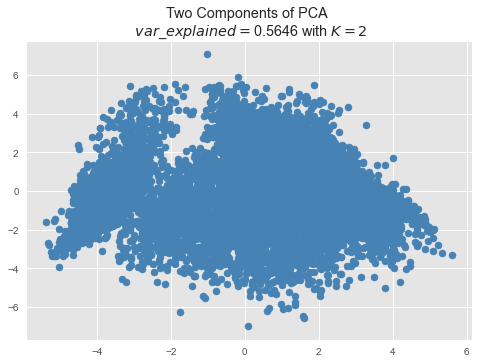

In [20]:
var_explained_2 = round(pca.explained_variance_ratio_[0:2].sum(), 4)
plt.scatter(X_pca[:, 0], X_pca[:, 1], color = "steelblue")
plt.title(f"Two Components of PCA \n $var\_explained = ${var_explained_2} with $K = 2$")

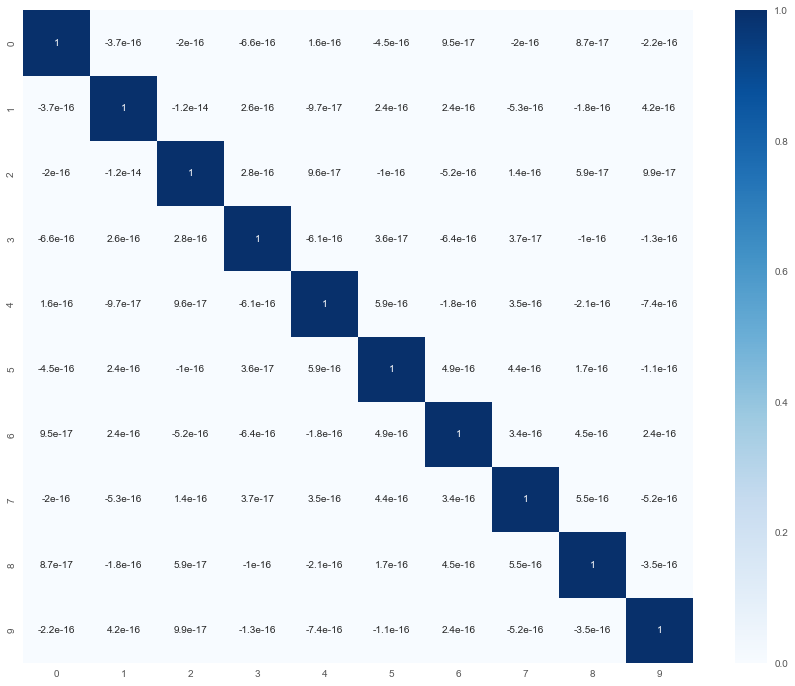

In [21]:
plt.figure(figsize = (15, 12))
sns.heatmap(pd.DataFrame(X_pca).corr(), annot = True, cmap = "Blues")
plt.show()

# K-means

## Number of clusters

In [22]:
range_n_clusters = range(1, 15)
inertias = []
silhouette = []
silhouette_range = range(2, 15)
for n_clusters in tqdm(range_n_clusters):
    model_kmeans = KMeans(
                        n_clusters   = n_clusters, 
                        n_init       = 20, 
                        random_state = RANDOM_STATE
                    )
    if n_clusters in silhouette_range:
        cluster_labels = model_kmeans.fit_predict(X_pca)
        silhouette_avg = silhouette_score(X_pca, cluster_labels)
        silhouette.append(silhouette_avg)
    else:
        model_kmeans.fit(X_pca)
    inertias.append(model_kmeans.inertia_)

100%|██████████████████████████████████████████████████████████████████████████████████| 14/14 [00:41<00:00,  3.00s/it]


### Elbow Method

It is not clear in what is the best $K$ value, then we need to use the formaly Elbow Method.

Text(0, 0.5, 'Intra-cluster (inertia)')

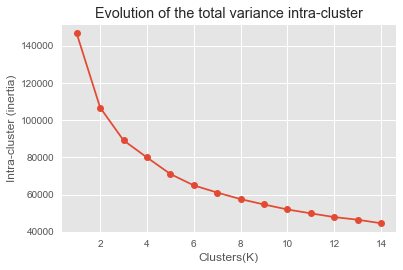

In [23]:
fig, ax = plt.subplots(1, 1, figsize=(6, 3.84))
ax.plot(range_n_clusters, inertias, marker='o')
ax.set_title("Evolution of the total variance intra-cluster")
ax.set_xlabel('Clusters(K)')
ax.set_ylabel('Intra-cluster (inertia)')

When working with k-means, we optimize the sum of squared distances between the observations and their centroids.

$$J(C) = \sum_{k=1}^K\sum_{i~\in~C_k} ||x_i - \mu_k||^2 \rightarrow \min\limits_K,$$

where $C$ – is a set of clusters with power $K$, $\mu_k$ is a centroid of a cluster $C_k$.

In the Elbow Method, we choose a number of clusters after which a function $J(C_k)$ is decreasing less rapidly. More formally,
$$D(k) = \frac{|J(C_k) - J(C_{k+1})|}{|J(C_{k-1}) - J(C_k)|}  \rightarrow \min\limits_k $$

In [24]:
# Elbow Method
df_inertias = pd.DataFrame({"elbow": inertias})
elbow = (df_inertias.shift(-1) - df_inertias.shift(-2))/(df_inertias - df_inertias.shift(-1))
elbow["K"] = range(2, len(elbow) + 2)
elbow[elbow.elbow.min() == elbow.elbow]

elbow  K
0  0.442875  2

In this case $K =2$

### Silhouette Method

The **silhouette coeficient $s_i$** is calculated for each observation $i$ such that:
$$s_i = \frac{b_i-a_i}{max\{b_i, a_i\}}$$

Where:
$a_i$ is the average of the distances between $i$ and other observations that belong in the same cluster.

$b_i$ is the smaller distance between $i$ and the other cluster. where the distance between $i$ and a cluster means
the average of the distances between $i$ and the elements of the cluster. A silhouette closer to one is better.

**It is clear that average value of the silhouette indexes is maximized with 3 clusters.**

Text(0, 0.5, 'Silhouette Average')

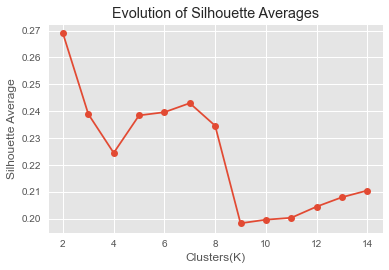

In [25]:
fig, ax = plt.subplots(1, 1, figsize = (6, 3.84))
ax.plot(silhouette_range, silhouette, marker = 'o')
ax.set_title("Evolution of Silhouette Averages")
ax.set_xlabel('Clusters(K)')
ax.set_ylabel('Silhouette Average')

$k = 2$ looks like a good number of clusters.

## Train Model

In [26]:
model_kmeans = KMeans(n_clusters   = 2, 
                      n_init       = 20, 
                      random_state = RANDOM_STATE)
cluster_labels = model_kmeans.fit_predict(X_pca)

In [27]:
# Plot First two principal components 
fig = px.scatter_3d(X_pca, x = X_pca[:, 0], y = X_pca[:, 1], z = X_pca[:, 2], color = cluster_labels) 
fig.show()

In [28]:
# Silhouette Visualizer
from yellowbrick.cluster import SilhouetteVisualizer
visualizer = SilhouetteVisualizer(model_kmeans, colors = 'yellowbrick')
visualizer.fit(X_pca)
visualizer.show()
plt.show()

## Medians of clusters

In [29]:
# Drop Useless Features
credit_card_transformed = credit_card.drop("CUST_ID", axis = 1)
data_cols = credit_card_transformed.columns

# Filling Missing Values
imp_median = SimpleImputer(missing_values = np.nan, strategy = "median")
credit_card_transformed = imp_median.fit_transform(credit_card_transformed)

# Scaler
scaler = StandardScaler()
credit_card_transformed = pd.DataFrame(scaler.fit_transform(credit_card_transformed),
                                       columns = data_cols)

credit_card_transformed["label"] = cluster_labels
credit_card_transformed

BALANCE  BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES  \
0    -0.731989          -0.249434  -0.424900         -0.356934   
1     0.786961           0.134325  -0.469552         -0.356934   
2     0.447135           0.518084  -0.107668          0.108889   
3     0.049099          -1.016953   0.232058          0.546189   
4    -0.358775           0.518084  -0.462063         -0.347294   
...        ...                ...        ...               ...   
8945 -0.737950           0.518084  -0.333293         -0.356934   
8946 -0.742423           0.518084  -0.329136         -0.356934   
8947 -0.740398          -0.185477  -0.401965         -0.356934   
8948 -0.745174          -0.185477  -0.469552         -0.356934   
8949 -0.572575          -0.889033   0.042146          0.301732   

      INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
0                  -0.349079     -0.466786            -0.806490   
1                  -0.454576      2.605605            -1.221758   
2                  -0.454576     -0.466786             1.269843   
3                  -0.454576     -0.368653            -1.014125   
4                  -0.454576     -0.466786            -1.014125   
...                      ...           ...                  ...   
8945               -0.132643     -0.466786             1.269843   
8946               -0.122823     -0.466786             1.269843   
8947               -0.294893     -0.466786             0.854576   
8948               -0.454576     -0.449352            -1.221758   
8949               -0.454576     -0.406205             0.439310   

      ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
0                      -0.678661                         -0.707313   
1                      -0.678661                         -0.916995   
2                       2.673451                         -0.916995   
3                      -0.399319                         -0.916995   
4                      -0.399319                         -0.916995   
...                          ...                               ...   
8945                   -0.678661                          1.179833   
8946                   -0.678661                          1.179833   
8947                   -0.678661                          0.760469   
8948                   -0.678661                         -0.916995   
8949                    1.556082                         -0.916995   

      CASH_ADVANCE_FREQUENCY  CASH_ADVANCE_TRX  PURCHASES_TRX  CREDIT_LIMIT  \
0                  -0.675349         -0.476070      -0.511333     -0.960378   
1                   0.573963          0.110074      -0.591796      0.688678   
2                  -0.675349         -0.476070      -0.109020      0.826100   
3                  -0.258913         -0.329534      -0.551565      0.826100   
4                  -0.675349         -0.476070      -0.551565     -0.905410   
...                      ...               ...            ...           ...   
8945               -0.675349         -0.476070      -0.350408     -0.960378   
8946               -0.675349         -0.476070      -0.350408     -0.960378   
8947               -0.675349         -0.476070      -0.390639     -0.960378   
8948                0.157527         -0.182998      -0.591796     -1.097800   
8949                0.990398         -0.182998       0.333524     -0.905410   

      PAYMENTS  MINIMUM_PAYMENTS  PRC_FULL_PAYMENT    TENURE  label  
0    -0.528979         -0.302400         -0.525551  0.360680      1  
1     0.818642          0.097500          0.234227  0.360680      0  
2    -0.383805         -0.093293         -0.525551  0.360680      1  
3    -0.598688         -0.228307         -0.525551  0.360680      0  
4    -0.364368         -0.257266         -0.525551  0.360680      0  
...        ...               ...               ...       ...    ...  
8945 -0.486217         -0.341250          1.183951 -4.122768      1  
8946 -0.503396         -0.228307         -0.525551 -4.12276

In [30]:
cluster_1 = credit_card_transformed.groupby("label").agg("median").iloc[0].to_frame().reset_index()
cluster_2 = credit_card_transformed.groupby("label").agg("median").iloc[1].to_frame().reset_index()
cluster_1.columns = ["theta", "r"]
cluster_2.columns = ["theta", "r"]

In [31]:
# Plot medians of clusters
fig = go.Figure()

fig.add_trace(go.Scatterpolar(
      r = cluster_1.r,
      theta = cluster_1.theta,
      fill = 'toself',
      name = 'Cluster 1'
))

fig.add_trace(go.Scatterpolar(
      r = cluster_2.r,
      theta = cluster_2.theta,
      fill = 'toself',
      name = 'Cluster 2'
))

fig.update_layout(
  polar = dict(
    radialaxis = dict(
      visible = True
    )),
  showlegend = False
)

# Technical Notes About Clustering

## Unsupervised Learning

The main feature of unsupervised learning algorithms, when compared to classification and regression methods, is that input data are unlabeled (i.e. no labels or classes given) and that the algorithm learns the structure of the data without any assistance.

**Advantage:**
- Process large amounts of data because the data does not need to be manually labeled.

**Disadvantage:**
- It is difficult to evaluate the quality of an unsupervised algorithm due to the absence of an explicit goodness metric as used in supervised learning

## Clustering

The main idea behind clustering is pretty straightforward. Basically, we say to ourselves, "**I have these points here, and I can see that they organize into groups. It would be nice to describe these things more concretely, and, when a new point comes in, assign it to the correct group.**"

In [32]:
# https://www.cienciadedatos.net/documentos/py20-clustering-con-python.html
# https://machinelearningmastery.com/clustering-algorithms-with-python/